# Dependences

In [2]:
# Check the versions of libraries

# Python version
import sys

# scipy
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# scikit-learn
import sklearn
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
import seaborn as sns

import pandas as pd
import numpy as np


import os 

my_imputer = SimpleImputer()


print('Python: {}'.format(sys.version))
print('scipy: {}'.format(scipy.__version__))
print('numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.7 (default, Oct 22 2018, 11:32:17) 
[GCC 8.2.0]
scipy: 1.1.0
numpy: 1.14.5
matplotlib: 2.2.2
pandas: 0.23.3
sklearn: 0.20.3


In [3]:
filepath = os.path.expanduser("~/data/cachexia/15_1_2019.xlsx")
dataset = pandas.read_excel(filepath)

In [4]:
print(dataset.groupby('GRUPO (CLASSIF)').size())

GRUPO (CLASSIF)
CC         62
CC+        37
CONTROL    84
WSC        59
dtype: int64


In [5]:
array = dataset.values

In [6]:
ds = dataset

In [21]:
    def col_nan_kde_histo_diag(x, **kwargs):
        df = pd.DataFrame({'x':x[:]})
        df = df.dropna()
        x = df['x']
        plt.gca()
        plt.hist(x)
    
    def col_nan_kde_histo(x, y, **kwargs):
        df = pd.DataFrame({'x':x[:],'y':y[:]})
        df = df.dropna()
        x = df['x']
        y = df['y']
        plt.gca()
        sns.kdeplot(x, y)
    
    plt.figure(figsize=(20, 15))
    g = sns.PairGrid(ds)
    g = g.map_upper(plt.scatter, alpha=0.3)
    g = g.map_diag(col_nan_kde_histo_diag)
    g = g.map_lower(col_nan_kde_histo)
    plt.savefig("1.png")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 5400x5400 with 0 Axes>

In [10]:
    def col_nan_kde_histo_diag(x, **kwargs):
        df = pd.DataFrame({'x':x[:]})
        df = df.dropna()
        x = df['x']
        plt.gca()
        plt.hist(x)
    
    def col_nan_kde_histo(x, y, **kwargs):
        df = pd.DataFrame({'x':x[:],'y':y[:]})
        df = df.dropna()
        x = df['x']
        y = df['y']
        
        bins = 10
        
        unique_x = x.unique()
        unique_y = y.unique()
        n_y = len(unique_y)
        n_x = len(unique_x)
        if (n_x < 10) and (n_y < 10):
            bins = np.ceil(np.max([n_x, n_y]))
        
        plt.gca()
        plt.hist2d(x, y, bins=bins)
        
    plt.figure(figsize=(20, 15))
    g = sns.PairGrid(ds)
    g = g.map_lower(col_nan_kde_histo)
    g = g.map_diag(col_nan_kde_histo_diag)
    g = g.map_upper(plt.scatter, alpha=0.3)

    plt.savefig("2.png")
    plt.clf()

<Figure size 1440x1080 with 0 Axes>

<Figure size 5400x5400 with 0 Axes>

In [8]:
ds.columns

Index(['IDADE', 'ALTURA', 'PESO HABITUAL', 'PESO ATUAL', 'Δ PESO',
       '% PERDA PESO', 'IMC (kg/m²)', 'Hemoglobina (g/dL)', 'PCR (mg/L)',
       'PCR/10', 'Albumina (g/dL)', 'PCR/Albumina (mg/g)', 'Col', 'Col (HDL)',
       'Glic', 'Trig', 'ALT', 'AST', 'Lact', 'Lac (mmol/L)', 'Col (LDL)',
       'Creat', 'QLQ-C30 Q. 1', 'QLQ-C30 Q. 2', 'QLQ-C30 Q. 3', 'QLQ-C30 Q. 4',
       'QLQ-C30 Q. 5', 'QLQ-C30 Q. 10', 'QLQ-C30 Q. 12', 'QLQ-C30 Q. 18',
       'QLQ-C30 Q. 13', 'GRUPO (CLASSIF)'],
      dtype='object')

In [30]:
ds = dataset.iloc[:, :]
#ds = dataset

def col_nan_kde_histo_diag(x, **kwargs):
    df = pd.DataFrame({'x':x[:]})
    df = df.dropna()
    x = df['x']
    plt.gca()
    plt.hist(x, histtype="step", linewidth=3)
    
def col_nan_kde_histo(x, y, **kwargs):
    df = pd.DataFrame({'x':x[:],'y':y[:]})
    df = df.dropna()
    x = df['x']
    y = df['y']
    plt.gca()
    try:
        sns.kdeplot(x, y, shade=True, n_levels=10, shade_lowest=False, antialiased=True,
                    alpha=0.5)
    except:
        return None
    

plt.figure(figsize=(20, 15))
g = sns.PairGrid(ds, hue="GRUPO (CLASSIF)")
g = g.map_diag(col_nan_kde_histo_diag)
g = g.map_lower(col_nan_kde_histo)
g = g.map_upper(plt.scatter, alpha=0.2)
g = g.add_legend()
plt.legend()
#plt.show()
plt.savefig("4.png")
plt.clf()

/usr/lib/python3/dist-packages/scipy/stats/kde.py:514: RuntimeWarning: invalid value encountered in sqrt
  self._norm_factor = sqrt(linalg.det(2*pi*self.covariance)) * self.n
/usr/lib/python3/dist-packages/scipy/stats/kde.py:215: RuntimeWarning: overflow encountered in exp
  result = result + exp(-energy)
/usr/lib/python3/dist-packages/matplotlib/contour.py:1480: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/usr/lib/python3/dist-packages/matplotlib/contour.py:1481: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


<Figure size 1440x1080 with 0 Axes>

<Figure size 5495x5400 with 0 Axes>

In [ ]:
plt.show()

In [12]:
X1 = array[:,3:22]
Y = array[:,31]

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X1)
X = imp.transform(X1)


validation_size = 0.20
seantialiased=Trueed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [13]:
# Spot Check Algorithms

models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [14]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring, error_score='raise')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
	

LR: 0.543684 (0.076463)
LDA: 0.615789 (0.091290)
KNN: 0.414737 (0.102329)
CART: 0.558421 (0.091923)
NB: 0.579211 (0.118722)
SVM: 0.341842 (0.091255)


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [15]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.4489795918367347
[[ 8  0  2  0]
 [ 2  3  2  0]
 [ 3  0 10  5]
 [ 4  0  9  1]]
              precision    recall  f1-score   support

          CC       0.47      0.80      0.59        10
         CC+       1.00      0.43      0.60         7
     CONTROL       0.43      0.56      0.49        18
         WSC       0.17      0.07      0.10        14

   micro avg       0.45      0.45      0.45        49
   macro avg       0.52      0.46      0.45        49
weighted avg       0.45      0.45      0.41        49



In [16]:
# Make predictions on validation dataset
cart = DecisionTreeClassifier()
cart.fit(X_train, Y_train)
predictions = cart.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7346938775510204
[[ 6  3  0  1]
 [ 2  5  0  0]
 [ 1  0 14  3]
 [ 1  0  2 11]]
              precision    recall  f1-score   support

          CC       0.60      0.60      0.60        10
         CC+       0.62      0.71      0.67         7
     CONTROL       0.88      0.78      0.82        18
         WSC       0.73      0.79      0.76        14

   micro avg       0.73      0.73      0.73        49
   macro avg       0.71      0.72      0.71        49
weighted avg       0.74      0.73      0.74        49



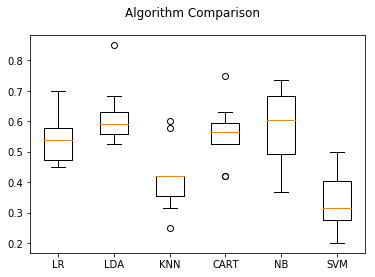

In [17]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()